In [1]:
# Работа с данными, визуализация
import pandas as pd         # Работа с  данными
import seaborn as sns        # Визуализация
import matplotlib.pyplot as plt  # Базовые  графики
import numpy as np

# Сохранение и загрузка модели
import pickle               # Сохранение модели

# Разделение ,нормализация
from sklearn.model_selection import train_test_split  # Обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler      # Стандартизация данных

# Модели для регрессии
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor  # Модель K-ближайших соседей

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('ebw_data.csv')

In [4]:
# Основная информация о данных
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB
None
              IW          IF         VW          FP      Depth      Width
count  72.000000   72.000000  72.000000   72.000000  72.000000  72.000000
mean   45.666667  141.333333   8.638889   78.333333   1.195556   1.970417
std     1.678363    5.145763   2.061078   21.493530   0.225081   0.279040
min    43.000000  131.000000   4.500000   50.000000   0.800000   1.680000
25%    44.000000  139.000000   8.000000   60.000000   1.080000   1.760000
50%    45.500000  141.000000   9.000000   80.000000   1.200000   1.840000
75%    47.000000  146.000000 

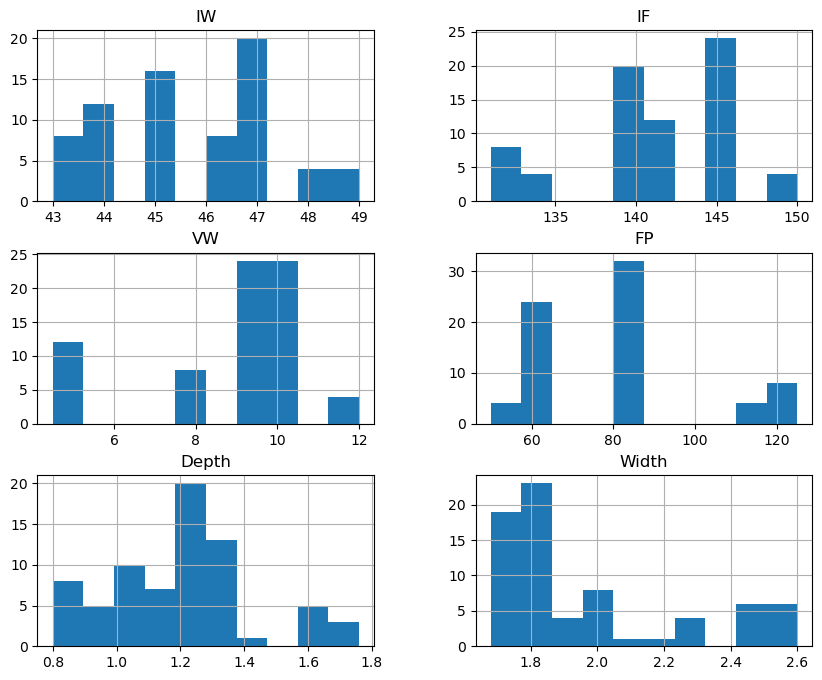

In [5]:
# Визуализация распределений
df.hist(figsize=(10, 8))
plt.show()

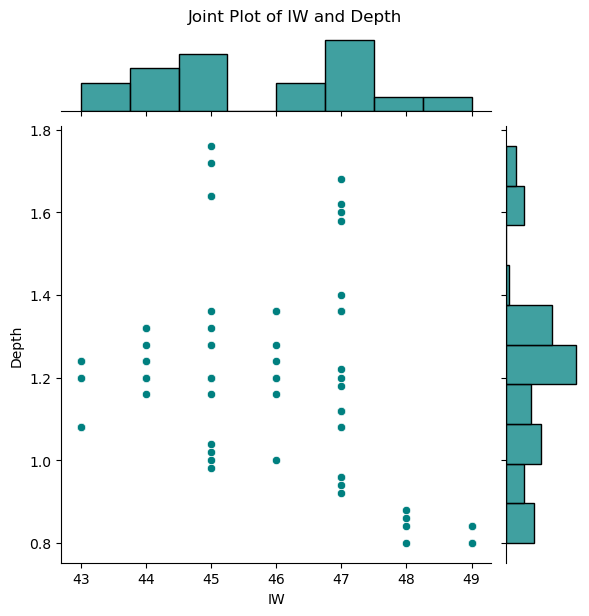

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot для IW и Depth
sns.jointplot(x='IW', y='Depth', data=df, kind='scatter', color='teal')
plt.suptitle('Joint Plot of IW and Depth', y=1.02)  # Заголовок с отступом
plt.show()

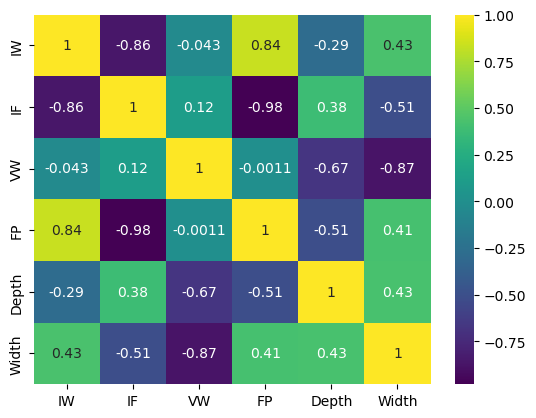

In [7]:
# Корреляция
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

Предобработка данных

In [8]:
# Проверка на пропуски
print(df.isnull().sum())

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64


Нормализация числовых признаков

In [9]:
# Нормализация
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['IW', 'IF', 'VW', 'FP']])

In [10]:
# Предобработка данных
X = df[['IW', 'IF', 'VW', 'FP']]
y_depth = df['Depth']
y_width = df['Width']

In [11]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X, y_depth, test_size=0.2, random_state=42)
X_train, X_test, y_width_train, y_width_test = train_test_split(X, y_width, test_size=0.2, random_state=42)

In [12]:
# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Модели машинного обучения

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train_depth, y_test_depth = train_test_split(X, y_depth, test_size=0.2, random_state=42)
_, _, y_train_width, y_test_width = train_test_split(X, y_width, test_size=0.2, random_state=42)

In [15]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Обучаем и применяем масштабирование к тренировочным данным
X_test_scaled = scaler.transform(X_test)  # Применяем масштабирование к тестовым данным

In [16]:
# Модель KNeighborsRegressor
knn_depth = KNeighborsRegressor(n_neighbors=5)  # Модель KNN для глубины
knn_width = KNeighborsRegressor(n_neighbors=5)  # Модель KNN для ширины

In [17]:
# Модель Random Forest Regressor
random_forest_regressor_depth = RandomForestRegressor(n_estimators=100, random_state=42)  # Модель Random Forest для глубины
random_forest_regressor_width = RandomForestRegressor(n_estimators=100, random_state=42)  # Модель Random Forest для ширины


In [23]:
# Обучение моделей
knn_depth.fit(X_train_scaled, y_train_depth)  # Обучаем модель KNN на глубине
knn_width.fit(X_train_scaled, y_train_width)  # Обучаем модель KNN на ширине
random_forest_regressor_depth.fit(X_train_scaled, y_train_depth)  # Обучаем модель Random Forest на глубине
random_forest_regressor_width.fit(X_train_scaled, y_train_width)  # Обучаем модель Random Forest на ширине

RandomForestRegressor(random_state=42)

In [25]:
# Прогнозирование
y_pred_knn_depth = knn_depth.predict(X_test_scaled)  # Предсказываем глубину для тестовой выборки
y_pred_knn_width = knn_width.predict(X_test_scaled)  # Предсказываем ширину для тестовой выборки

y_pred_rf_depth = random_forest_regressor_depth.predict(X_test_scaled)  # Предсказываем глубину для тестовой выборки
y_pred_rf_width = random_forest_regressor_width.predict(X_test_scaled)  # Предсказываем ширину для тестовой выборки


In [26]:
# Оценка моделей KNN
mae_knn_depth = mean_absolute_error(y_test_depth, y_pred_knn_depth)  # Средняя абсолютная ошибка для KNN по глубине
rmse_knn_depth = mean_squared_error(y_test_depth, y_pred_knn_depth, squared=False)  # RMSE для KNN по глубине
r2_knn_depth = r2_score(y_test_depth, y_pred_knn_depth)  # Коэффициент детерминации R² для KNN по глубине

mae_knn_width = mean_absolute_error(y_test_width, y_pred_knn_width)  # Средняя абсолютная ошибка для KNN по ширине
rmse_knn_width = mean_squared_error(y_test_width, y_pred_knn_width, squared=False)  # RMSE для KNN по ширине
r2_knn_width = r2_score(y_test_width, y_pred_knn_width)  # Коэффициент детерминации R² для KNN по ширине

In [27]:
# Оценка моделей Random Forest
mae_rf_depth = mean_absolute_error(y_test_depth, y_pred_rf_depth)  # Средняя абсолютная ошибка для Random Forest по глубине
rmse_rf_depth = mean_squared_error(y_test_depth, y_pred_rf_depth, squared=False)  # RMSE для Random Forest по глубине
r2_rf_depth = r2_score(y_test_depth, y_pred_rf_depth)  # Коэффициент детерминации R² для Random Forest по глубине

mae_rf_width = mean_absolute_error(y_test_width, y_pred_rf_width)  # Средняя абсолютная ошибка для Random Forest по ширине
rmse_rf_width = mean_squared_error(y_test_width, y_pred_rf_width, squared=False)  # RMSE для Random Forest по ширине
r2_rf_width = r2_score(y_test_width, y_pred_rf_width)  # Коэффициент детерминации R² для Random Forest по ширине


In [33]:
# Выводим результаты для KNN
print(f"KNN (Depth) - MAE: {mae_knn_depth:.3f}, RMSE: {rmse_knn_depth:.3f}, R²: {r2_knn_depth:.3f}")
print(f"KNN (Width) - MAE: {mae_knn_width:.3f}, RMSE: {rmse_knn_width:.3f}, R²: {r2_knn_width:.3f}")
#Выводим результаты для Random Forest
print(f"Random Forest Regressor (Depth) - MAE: {mae_rf_depth:.3f}, RMSE: {rmse_rf_depth:.3f}, R²: {r2_rf_depth:.3f}")
print(f"Random Forest Regressor (Width) - MAE: {mae_rf_width:.3f}, RMSE: {rmse_rf_width:.3f}, R²: {r2_rf_width:.3f}")

KNN (Depth) - MAE: 0.095, RMSE: 0.117, R²: 0.766
KNN (Width) - MAE: 0.026, RMSE: 0.031, R²: 0.991
Random Forest Regressor (Depth) - MAE: 0.069, RMSE: 0.088, R²: 0.866
Random Forest Regressor (Width) - MAE: 0.038, RMSE: 0.046, R²: 0.979


## Итоговый анализ:

1. **Глубина (Depth)**:
   - **Random Forest Regressor** демонстрирует наилучшие результаты для предсказания `Depth`, превосходя KNN по всем метрикам:
     - Низкие значения **MAE** (0.069) и **RMSE** (0.088) показывают, что модель допускает меньшие ошибки.
     - Более высокий **R²** (0.866) указывает на хорошее объяснение моделью вариаций данных по глубине.
   - **Рекомендация**: Для предсказания `Depth` предпочтительнее использовать Random Forest, так как эта модель лучше захватывает сложные зависимости в данных.

2. **Ширина (Width)**:
   - **KNN** показывает лучшие результаты по предсказанию `Width`:
     - Очень низкие значения **MAE** (0.026) и **RMSE** (0.031) свидетельствуют о высокой точности предсказания.
     - Высокий **R²** (0.991) означает, что модель почти полностью объясняет вариативность данных по ширине.
   - **Рекомендация**: Для предсказания `Width` KNN является более подходящим вариантом, так как он лучше отражает более простую структуру данных.

## Предложения по улучшению:

- **Гибридный подход**: Применение обеих моделей — **Random Forest для глубины** и **KNN для ширины** — позволит добиться высокой точности предсказаний по каждому параметру.
- **Оптимизация моделей**: Чтобы улучшить точность, можно провести подбор гиперпараметров, например, настроить количество деревьев в Random Forest и количество соседей в KNN.
- **Анализ и улучшение данных**: Изучение данных и возможное добавление новых признаков могут ещё больше повысить качество предсказаний для обеих моделей.

Эти шаги помогут адаптировать подход к особенностям каждой целевой переменной и добиться оптимальных результатов.